In [197]:
import pandas as pd
import numpy as np
import plotly.express as px

In [206]:
fig = px.bar(df, x ='sudden weight loss', color ='Gender')
fig.show()

In [207]:
fig = px.histogram(df, x ='visual blurring', color ='Gender',
                  color_discrete_sequence=['lightgreen'])
fig.show()

In [200]:
import plotly.graph_objects as go

labels = ['Oxygen','Hydrogen','Carbon_Dioxide','Nitrogen']
values = [4500, 2500, 1053, 500]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

In [210]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
DF = df
fig = px.pie(DF, values='Alopecia', names='class', color='class', title= 'Sudden Weight Loss correlation with Diabetes', hole= .5, 
             color_discrete_map = {1: 'royalblue', 
                                   0: 'turquoise'})
fig.show()

In [211]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
DF = df
fig = px.pie(DF, values='Polyphagia', names='class', color= 'class', title= 'Polyphagia correlation with Diabetes', hole= .5,
             color_discrete_map = {1: 'royalblue', 
                                   0: 'turquoise'})
fig.show()

In [212]:
import plotly.express as px
DF = df
fig = px.pie(DF, values='visual blurring', names='class',color= 'class', title= 'Visual Blurring correlation with Diabetes', hole= .5, 
             color_discrete_map = {1: 'royalblue', 
                                   0: 'turquoise'})
fig.show()

In [213]:
df = pd.read_csv('diabetes_data_upload.csv')

In [214]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [215]:
Visual Blurring 


What is Visual Blurring -  A visual symptom that makes it difficult to see clearly or sharply


How does this symptom relate to diabetes -  If your blood sugar levels change quickly from low to normal, the shape of your eye's lens' can be affected, and your vision can be blurred.


What is the effect - Blurry or wavy vision in the center of your field of vision

SyntaxError: invalid syntax (3535386915.py, line 1)

In [216]:
df['Age'].isnull().values.any()

False

In [217]:
results = []
for col in df.columns:
    missing_or_not = df[col].isnull().values.any()
    print(col + ' ' + str(missing_or_not))

Age False
Gender False
Polyuria False
Polydipsia False
sudden weight loss False
weakness False
Polyphagia False
Genital thrush False
visual blurring False
Itching False
Irritability False
delayed healing False
partial paresis False
muscle stiffness False
Alopecia False
Obesity False
class False


In [218]:
def Change_to_Value (Input):
    if Input == 'Yes':
        return 1
    else:
        return 0

In [219]:
Change_to_Value('No')

0

In [220]:
def convert(x):
    if x == 'Yes' or x == 'Male' or x == 'Positive':
        return 1
    else:
        return 0


In [221]:
convert('Male')

1

In [222]:
df['Gender'].apply(convert)

0      1
1      1
2      1
3      1
4      1
      ..
515    0
516    0
517    0
518    0
519    1
Name: Gender, Length: 520, dtype: int64

In [223]:
df['Gender']

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
515    Female
516    Female
517    Female
518    Female
519      Male
Name: Gender, Length: 520, dtype: object

In [224]:
for col in df.columns:
    if col != 'Age':
        df[col] = df[col].apply(convert)

In [225]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [226]:
X = df.drop(['class'], axis = 1)
Y = df['class']

In [227]:
X.corrwith(Y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

In [228]:
corr = df.corr()

In [229]:
corr = df.corr()
corr['class']

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
class                 1.000000
Name: class, dtype: float64

In [324]:
corr = df.corr()
fig = px.imshow(corr, aspect="auto", color_continuous_scale='icefire', text_auto = True)
fig.show()




In [231]:
corr_data = X.corrwith(Y).to_frame().reset_index()
fig = px.bar(corr_data, x='index', y=0, title="Correlation between Features and Having Diabetes")
fig.show()


In [232]:
X = df.drop(['class', 'Age', 'weakness', 'Genital thrush', 'Itching', 'delayed healing', 'muscle stiffness', 'Obesity'], axis = 1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)





In [233]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)



In [234]:
# Logistic Regression

In [235]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


In [236]:
clf = LogisticRegression(random_state=0).fit(X, y)

In [237]:
y_hat = clf.predict(x_test)
y_hat

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [238]:
#Compute your MSE.
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.5461538461538461


<AxesSubplot:>

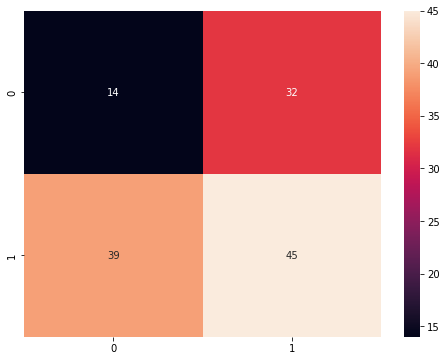

In [239]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [240]:
#precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.30434783, 0.53571429])

In [241]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

59

In [242]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.26415094, 0.58441558])

In [243]:
# svm linear

In [244]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [245]:
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [246]:
y_hat = clf.predict(x_test)
y_hat

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [247]:
#Compute your MSE.
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.5230769230769231


<AxesSubplot:>

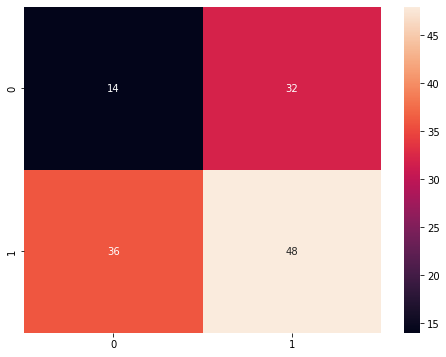

In [248]:
#Create a confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [249]:
# precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.30434783, 0.57142857])

In [250]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

62

In [251]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.28, 0.6 ])

In [252]:
#KNN

In [253]:
import sklearn #our favorite machine learning library
from sklearn.neighbors import KNeighborsClassifier as KNN #this will import our model as KNN

In [254]:
# Creating the KNN model object -- we need to tell it the number of neighbors to look at.
k = 7 #number of neighbors to look at (look at 7 nearest neighbors)
my_KNN_model = KNN(n_neighbors=k)

In [255]:
my_KNN_model.fit(x_train, y_train) #train the model on our past results x_train (inputs) and y_train (outputs)

KNeighborsClassifier(n_neighbors=7)

In [256]:
y_hat = my_KNN_model.predict(x_test)

In [257]:
y_hat

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [258]:
np.array(y_test)

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [259]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)


0.38461538461538464


<AxesSubplot:>

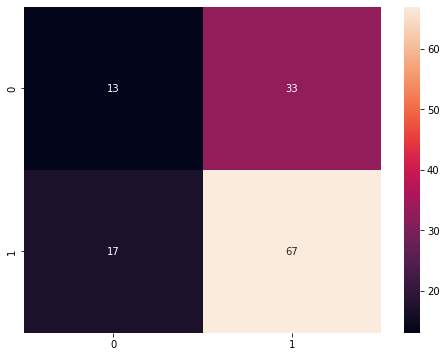

In [260]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [261]:
# precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.2826087 , 0.79761905])

In [262]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

80

In [263]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.43333333, 0.67      ])

In [264]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [265]:
#RBF

<AxesSubplot:>

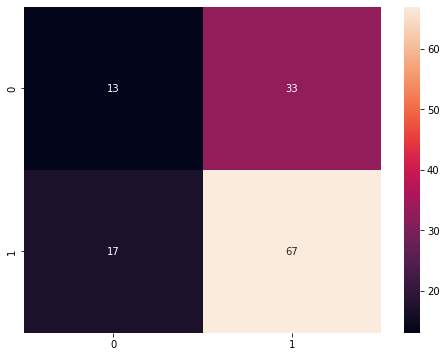

In [266]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [267]:
# precision
from sklearn.metrics import precision_score
precision_score(y_hat, y_test,  average=None)


array([0.2826087 , 0.79761905])

In [268]:
# accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_hat, y_test, normalize=False)

80

In [269]:
# recall
from sklearn.metrics import recall_score
recall_score(y_hat, y_test, average=None)

array([0.43333333, 0.67      ])

In [270]:
#Logistic regression
#svmrbf and svm linear
#knn
#naive bayes
#Decision trees
#Random forest

precision, accuracy, recall

NameError: name 'precision' is not defined

In [271]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test ,y_train, y_test = train_test_split(X, Y)


In [272]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(390, 9)
(130, 9)
(390,)
(130,)


In [273]:
x_test.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia
83,0,1,1,0,0,1,0,1,0
143,1,1,0,1,0,0,0,1,0
102,0,0,1,1,0,1,0,0,1
261,1,1,1,1,0,0,1,1,0
91,0,1,1,1,1,1,1,1,0


In [274]:
 y_train.head()

467    0
428    1
85     1
489    0
245    0
Name: class, dtype: int64

In [275]:
y_test.head

<bound method NDFrame.head of 83     1
143    1
102    1
261    1
91     1
      ..
222    0
453    1
497    0
445    1
283    0
Name: class, Length: 130, dtype: int64>

In [276]:
#KNN

In [277]:
import sklearn #our favorite machine learning library
from sklearn.neighbors import KNeighborsClassifier as KNN #this will import our model as KNN
from sklearn.model_selection import GridSearchCV

In [278]:
# Creating the KNN model object -- we need to tell it the number of neighbors to look at.
k = 7 #number of neighbors to look at (look at 7 nearest neighbors)
parameters = {'n_neighbors':[3, 5, 7], 'weights': ('uniform', 'distance'), 'algorithm': ('auto', 'ball_tree')}
my_KNN_model = KNN()

In [279]:
clf = GridSearchCV(my_KNN_model, parameters)

In [280]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree'),
                         'n_neighbors': [3, 5, 7],
                         'weights': ('uniform', 'distance')})

In [281]:
clf.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}

In [282]:
clf.best_score_

0.9358974358974359

In [283]:
pred = clf.predict(x_test)

In [284]:
(pred == y_test).mean()

0.9461538461538461

In [285]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)


0.49230769230769234


<AxesSubplot:>

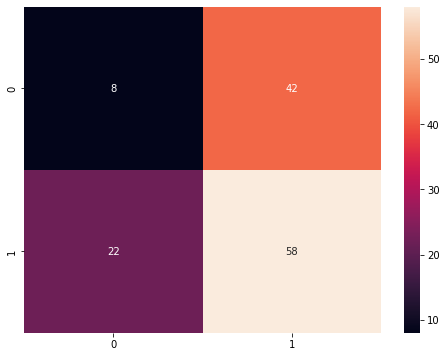

In [286]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [287]:
#SVM linear

In [288]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV

In [289]:
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
parameters = {'penalty': ('l1', 'l2'),'loss':('hinge','squared_hinge'), 'multi_class':('ovr', 'crammer_singer')}
my_svm_model = LinearSVC()


In [290]:
clf = GridSearchCV(my_svm_model, parameters)

In [291]:
clf.fit(x_train, y_train)

/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


10 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/svm/_classes.py", line 257, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_lib

GridSearchCV(estimator=LinearSVC(),
             param_grid={'loss': ('hinge', 'squared_hinge'),
                         'multi_class': ('ovr', 'crammer_singer'),
                         'penalty': ('l1', 'l2')})

In [292]:
clf.best_params_

{'loss': 'hinge', 'multi_class': 'crammer_singer', 'penalty': 'l1'}

In [293]:
clf.best_score_

0.9153846153846154

In [294]:
pred = clf.predict(x_test)

In [295]:
(pred == y_test).mean()

0.8692307692307693

In [296]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)


0.49230769230769234


<AxesSubplot:>

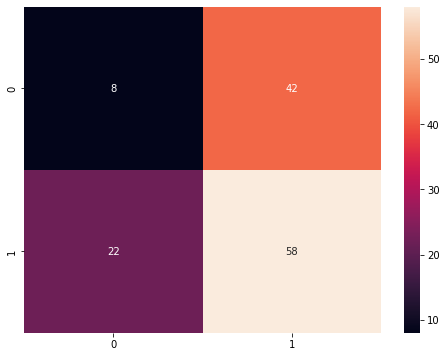

In [297]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [298]:
# Logistic Regression

In [299]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [300]:
clf = LogisticRegression(random_state=0).fit(X, y)
parameters = {'penalty': ('l1', 'l2', 'elasticnet'), 'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')}
my_LR_model = LogisticRegression()

In [301]:
clf = GridSearchCV(my_LR_model, parameters)

In [302]:
clf.fit(x_train, y_train)

/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


40 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/b36ed0b0-d7f5-416a-895a-d63c582b0b71/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, 

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ('l1', 'l2', 'elasticnet'),
                         'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga')})

In [303]:
clf.best_params_

{'penalty': 'l2', 'solver': 'newton-cg'}

In [304]:
clf.best_score_

0.9076923076923077

In [305]:
pred = clf.predict(x_test)

In [306]:
(pred == y_test).mean()

0.8692307692307693

In [307]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.49230769230769234


<AxesSubplot:>

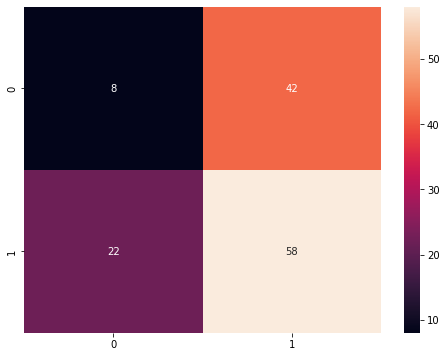

In [308]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [309]:
# RBF

In [310]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


In [311]:
clf = make_pipeline(StandardScaler(),SVC(gamma='auto')).fit(X,y)
parameters = {'kernel': ('rbf', 'linear'),'decision_function_shape':('ovo', 'ovr')}
my_svc_model = SVC()

In [312]:
clf = GridSearchCV(my_svc_model, parameters)

In [313]:
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'decision_function_shape': ('ovo', 'ovr'),
                         'kernel': ('rbf', 'linear')})

In [314]:
clf.best_params_

{'decision_function_shape': 'ovo', 'kernel': 'rbf'}

In [315]:
clf.best_score_

0.9307692307692308

In [316]:
pred = clf.predict(x_test)

In [317]:
(pred == y_test).mean()

0.9384615384615385

In [318]:
total_squared_error = (np.sum((y_test - y_hat)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error = total_squared_error/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error)

0.49230769230769234


<AxesSubplot:>

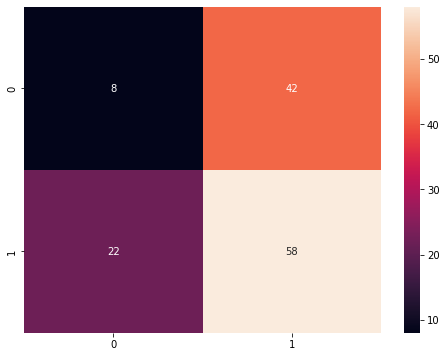

In [319]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8, 6))
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')


In [320]:
# Coin Toss
import random
Coin_Sides = ('Heads', 'Tails')
Result = random.choice(Coin_Sides)
print(Result)

Tails


In [321]:
import plotly.graph_objects as go

labels = df['Gender','Polyuria','Polydipsia','sudden weight loss', 'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis', 'Alopecia']
values = df['Gender','Polyuria','Polydipsia','sudden weight loss', 'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis', 'Alopecia']

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.show()

KeyError: ('Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis', 'Alopecia')

In [322]:
x_test.head()


,Gender,Polyuria,Polydipsia,sudden weight loss,Polyphagia,visual blurring,Irritability,partial paresis,Alopecia
83,0,1,1,0,0,1,0,1,0
143,1,1,0,1,0,0,0,1,0
102,0,0,1,1,0,1,0,0,1
261,1,1,1,1,0,0,1,1,0
91,0,1,1,1,1,1,1,1,0


In [323]:
import plotly.express as px
fig = px.pie(data, values= 'Gender','Polyuria','Polydipsia','sudden weight loss', 'Polyphagia', 'visual blurring', 'Irritability', 'partial paresis', 'Alopecia')
fig.show()


SyntaxError: positional argument follows keyword argument (2691184160.py, line 2)

In [326]:
import plotly.express as px

fig = make_subplots(rows=3, cols=3)

fig.append_trace(go.Histogram(name="Gender", x=df['Gender'], y=df['class']),row=1, col=1)
fig.append_trace(go.Histogram(name='Irritability', x=df['Irritability'], y=df['class']),row=1, col=2)
fig.append_trace(go.Histogram(name = 'partial paresis', x=df['partial paresis'], y=df['class']),row=1, col=3)
fig.append_trace(go.Histogram(name = 'sudden weight loss', x=df['sudden weight loss'], y=df['class']), row=2, col=1)
fig.append_trace(go.Histogram(name = 'Polyphagia', x=df['Polyphagia'], y=df['class']),row=2, 
fig.append_trace(go.Histogram(name = 'Polydipsia', x=df['Polydipsia'], y=df['class']),row=3, col=1)
fig.append_trace(go.Histogram(name = 'visual blurring', x=df['visual blurring'], y=df['class']), row=3, col=2)
fig.append_trace(go.Histogram(name = 'Alopecia', x=df['Alopecia'], y=df['class']),row=3, col=3)

fig.update_layout(legend_title_text='Features', title_text='Positive or Negative Features', title_x=0.5)
fig.show()

fig.write_html("histograms.html")


SyntaxError: invalid syntax (370548477.py, line 11)

In [328]:
library(plotly)
library(dplyr)

# Get Manufacturer
mtcarsmanuf <- sapply(strsplit(rownames(mtcars), " "), "[[", 1)

df <- mtcars
df <- df group_by(manuf)
df <- df summarize(count = n())
fig <- df plot_ly(labels = ~manuf, values = ~count)
fig <- fig add_pie(hole = 0.6)
fig <- fig layout(title = "Donut charts using Plotly",  showlegend = F,
                      xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
                      yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))

fig

SyntaxError: invalid syntax (2104176713.py, line 8)

In [332]:
library(plotly)
library(dplyr)


fig  = fig add_pie(data = count(diamonds, cut), labels = ~cut, values = ~n,
          name = "Cut", domain = list(x = c(0, 0.4), y = c(0.4, 1)))
fig = fig add_pie(data = count(diamonds, color), labels = ~color, values = ~n,
          name = "Color", domain = list(x = c(0.6, 1), y = c(0.4, 1)))
fig  = fig add_pie(data = count(diamonds, clarity), labels = ~clarity, values = ~n,
          name = "Clarity", domain = list(x = c(0.25, 0.75), y = c(0, 0.6)))
fig =  fig layout(title = "Pie Charts with Subplots", showlegend = F,
         xaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE),
         yaxis = list(showgrid = FALSE, zeroline = FALSE, showticklabels = FALSE))

fig.show()

SyntaxError: invalid syntax (3463595689.py, line 5)

In [333]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df['class']
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}],[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=3, cols=3, specs=specs)

fig.add_trace(go.Pie(labels=labels, values= df['Gender'], name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values= df['Alopecia'], name="Alopecia"),
              1, 2)
fig.add_trace(go.Pie(labels=labels, values= df['visual blurring'], name="visual blurring"),
              1, 3)
fig.add_trace(go.Pie(labels=labels, values= df['Polydipsia'], name="Polydipsia"),
              2, 1)
fig.add_trace(go.Pie(labels=labels, values= df['Polyphagia'], name="Polyphagia"),
              2, 2)
fig.add_trace(go.Pie(labels=labels, values= df['Polyuria'], name="Polyuria"),
              2, 3)
fig.add_trace(go.Pie(labels=labels, values= df['sudden weight loss'], name="sudden weight loss"),
              3, 1)
fig.add_trace(go.Pie(labels=labels, values= df['partial paresis'], name="partial paresis"),
              3, 2)
fig.add_trace(go.Pie(labels=labels, values= df['Irritability'], name="Irritability"),
              3, 3)


# Use hole to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="percent+name")
fig.write_html("PIE2.html")
fig.show()